# 使用python 控制solver的流程

```
import matplotlib.pyplot as plt  
import caffe   
caffe.set_device(0)  
caffe.set_mode_gpu()   
# 使用SGDSolver，即随机梯度下降算法  
solver = caffe.SGDSolver('/home/xxx/mnist/solver.prototxt')  
  
# 等价于solver文件中的max_iter，即最大解算次数  
niter = 9380  
# 每隔100次收集一次数据  
display= 100  
  
# 每次测试进行100次解算，10000/100  
test_iter = 100  
# 每500次训练进行一次测试（100次解算），60000/64  
test_interval =938  
  
#初始化 
train_loss = zeros(ceil(niter * 1.0 / display))   
test_loss = zeros(ceil(niter * 1.0 / test_interval))  
test_acc = zeros(ceil(niter * 1.0 / test_interval))  
  
# iteration 0，不计入  
solver.step(1)  
  
# 辅助变量  
_train_loss = 0; _test_loss = 0; _accuracy = 0  
# 进行解算  
for it in range(niter):  
    # 进行一次解算  
    solver.step(1)  
    # 每迭代一次，训练batch_size张图片  
    _train_loss += solver.net.blobs['SoftmaxWithLoss1'].data  
    if it % display == 0:  
        # 计算平均train loss  
        train_loss[it // display] = _train_loss / display  
        _train_loss = 0  
  
    if it % test_interval == 0:  
        for test_it in range(test_iter):  
            # 进行一次测试  
            solver.test_nets[0].forward()  
            # 计算test loss  
            _test_loss += solver.test_nets[0].blobs['SoftmaxWithLoss1'].data  
            # 计算test accuracy  
            _accuracy += solver.test_nets[0].blobs['Accuracy1'].data  
        # 计算平均test loss  
        test_loss[it / test_interval] = _test_loss / test_iter  
        # 计算平均test accuracy  
        test_acc[it / test_interval] = _accuracy / test_iter  
        _test_loss = 0  
        _accuracy = 0  
        
# 绘制train loss、test loss和accuracy曲线  
print '\nplot the train loss and test accuracy\n'  
_, ax1 = plt.subplots()  
ax2 = ax1.twinx()  
  
# train loss -> 绿色  
ax1.plot(display * arange(len(train_loss)), train_loss, 'g')  
# test loss -> 黄色  
ax1.plot(test_interval * arange(len(test_loss)), test_loss, 'y')  
# test accuracy -> 红色  
ax2.plot(test_interval * arange(len(test_acc)), test_acc, 'r')  
  
ax1.set_xlabel('iteration')  
ax1.set_ylabel('loss')  
ax2.set_ylabel('accuracy')  
plt.show()  
```

# 预先读入 solver.prototxt

In [40]:
import matplotlib.pyplot as plt  
import caffe   
caffe.set_device(0)  
caffe.set_mode_gpu()   
solver = r"C:\Users\an\Documents\study\caffe_tutorial\mnist\mnist\solver.prototxt"
solver = caffe.SGDSolver(solver)  
solver

In [41]:
solver.net.blobs['ImageData1'].data.shape
# 初始所有的blobs里头的值都是没有的


(64L, 3L, 28L, 28L)

# solver 是可以一步一步跑的


In [42]:
# iteration 0，不计入  
solver.step(1)  
solver.net.blobs['ImageData1'].data.shape,solver.net.blobs['ImageData2'].data.shape

((64L, 3L, 28L, 28L), (64L,))

# solver 中还有 test_net

In [43]:
solver.test_nets[0].blobs['ImageData1'].data.shape
# 对于solver中存在的参数，可以手动进行forward()

(100L, 3L, 28L, 28L)

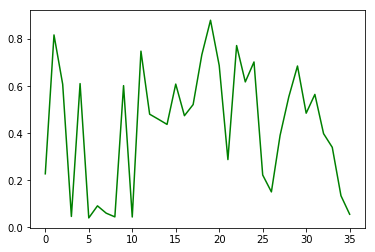

In [52]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
img = fig.add_subplot(111)
img.plot(np.random.rand(36),'green')

plt.show()

In [53]:
import matplotlib.animation as antt

# solver

In [7]:
import matplotlib.pyplot as plt  
import numpy as np
from numpy import zeros,ceil
import caffe   
caffe.set_device(0)  
caffe.set_mode_gpu()   
# 使用SGDSolver，即随机梯度下降算法  
solver = caffe.SGDSolver(r'C:\Users\an\Documents\study\caffe_tutorial\mnist\mnist\solver.prototxt')  
  
# 等价于solver文件中的max_iter，即最大解算次数  
niter = 9380  
# 每隔100次收集一次数据  
display= 100  
  
# 每次测试进行100次解算，10000/100  
test_iter = 100  
# 每500次训练进行一次测试（100次解算），60000/64  
test_interval =938  
  
#初始化 
train_loss = zeros(int(ceil(niter * 1.0 / display)))   
test_loss = zeros(int(ceil(niter * 1.0 / test_interval)))
test_acc = zeros(int(ceil(niter * 1.0 / test_interval)))
  
# iteration 0，不计入  
solver.step(1)  
  
# 辅助变量  
_train_loss = 0; _test_loss = 0; _accuracy = 0  
# 进行解算  
for it in range(niter):  
    # 进行一次解算  
    solver.step(1)  
    # 每迭代一次，训练batch_size张图片  
    _train_loss += solver.net.blobs['SoftmaxWithLoss1'].data  
    if it % display == 0:  
        # 计算平均train loss  
        train_loss[it // display] = _train_loss / display  
        _train_loss = 0  
        
    if it % test_interval == 0:  
        for test_it in range(test_iter):  
            # 进行一次测试  
            solver.test_nets[0].forward()  
            # 计算test loss  
            _test_loss += solver.test_nets[0].blobs['SoftmaxWithLoss1'].data  
            # 计算test accuracy  
            _accuracy += solver.test_nets[0].blobs['Accuracy1'].data  
        # 计算平均test loss  
        test_loss[it / test_interval] = _test_loss / test_iter  
        # 计算平均test accuracy  
        test_acc[it / test_interval] = _accuracy / test_iter  
        _test_loss = 0  
        _accuracy = 0  
        
# # 绘制train loss、test loss和accuracy曲线  
# print '\nplot the train loss and test accuracy\n'  
# _, ax1 = plt.subplots()  
# ax2 = ax1.twinx()  
  
# # train loss -> 绿色  
# ax1.plot(display * arange(len(train_loss)), train_loss, 'g')  
# # test loss -> 黄色  
# ax1.plot(test_interval * arange(len(test_loss)), test_loss, 'y')  
# # test accuracy -> 红色  
# ax2.plot(test_interval * arange(len(test_acc)), test_acc, 'r')  
  
# ax1.set_xlabel('iteration')  
# ax1.set_ylabel('loss')  
# ax2.set_ylabel('accuracy')  
# plt.show() 

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt  
import numpy as np
from numpy import zeros,ceil
import caffe  
caffe.set_device(0)  
caffe.set_mode_gpu()   
# 使用SGDSolver，即随机梯度下降算法  
solver = caffe.SGDSolver(r'C:\Users\an\Documents\study\caffe_tutorial\mnist\mnist\solver4.prototxt')  

solver.net.copy_from(r'C:\Users\an\Documents\study\caffe_tutorial\mnist\mnist\lenet_iter_4000.caffemodel')

In [6]:
solver.step(1)